## Algoritmi Classici
Il notebook addestra tre classificatori utilizzando tre tecniche distinte:
  
  - Support Vector Machine;
  - Stochastic Gradient Descent;
  - Multi Layer Perceptron.

### Import

In [1]:
import os

import cv2

from joblib import dump

from matplotlib import pyplot as plt

import numpy as np

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

### Configurazione

In [2]:
classes = ['happy', 'sad']
labels = [i for i in range(len(classes))]
class_dict = dict(zip(labels, classes))

train_dir = '../data/train/'
max_examples = 2500

random_state = 42

model_dir = '../models/'

### Caricamento dei dati

In [3]:
examples = list()

for (label, path) in class_dict.items():
    current_dir = os.path.join(os.getcwd(), train_dir, path)
    i = 0
    for image_path in os.listdir(current_dir):
        if max_examples != None and i > max_examples:
            break
        image = cv2.cvtColor(cv2.imread(os.path.join(current_dir, image_path)), cv2.COLOR_BGR2GRAY)
        examples.append((image, label))
        i += 1

### Visualizzazione dei dati

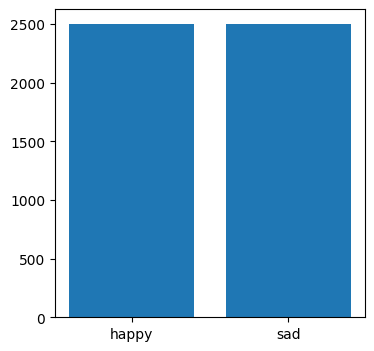

In [4]:
example_stats = dict()

for example in examples:
    current_class = class_dict[example[1]]
    if not current_class in example_stats:
        example_stats[current_class] = 0
    example_stats[current_class] += 1

plt.figure(figsize=(2 * len(example_stats.items()), 4))
plt.bar(example_stats.keys(), example_stats.values())
plt.show()

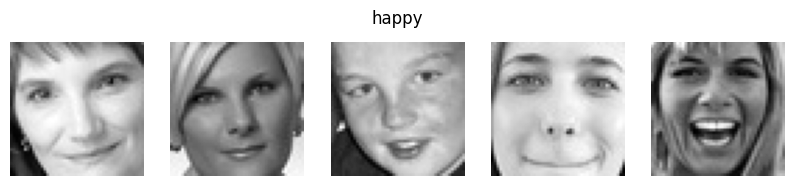

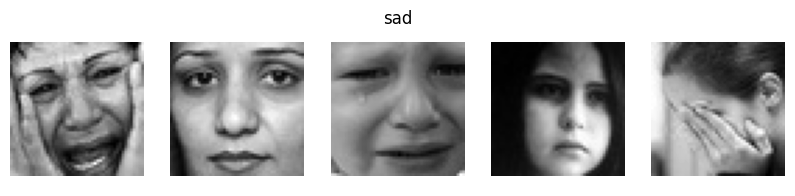

In [5]:
previous_examples_amount = 0

for current_class in class_dict.items():
    figure = plt.figure(figsize=(10, 2))
    plt.title(current_class[1])
    plt.axis('off')

    n_examples = 5
    previous_examples_amount += example_stats[class_dict[current_class[0] - 1]] if current_class[0] > 0 else 0
    axes = figure.subplots(1, n_examples)
    for i in range(n_examples):
        axes[i].axis('off')
        axes[i].imshow(examples[i + previous_examples_amount][0], cmap='gray')

    plt.show()

### Addestramento

In [6]:
def plot_learning_curves(train_sizes, train_scores, test_scores, title='Learning curves'):
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    _, ax = plt.subplots()
    ax.set_title(title)
    ax.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    ax.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    ax.legend(loc='best')

In [7]:
def print_best_params(clf, params):
    if not hasattr(clf, 'best_params_'):
        return
    for param_name in sorted(params.keys()):
        print('{}: {}'.format(param_name, clf.best_params_[param_name]))

In [8]:
def make_predictions(clf, X_test, y_test):
    y_predict = clf.predict(X_test)

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict))
    disp.plot()
    plt.show()

    print(classification_report(y_test, y_predict, target_names=classes))

#### Train, test split

In [9]:
X = []
y = []

for example in examples:
    X.append(example[0].flatten())
    y.append(example[1])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Training set shape {} - Training labels {}'.format(X_train.shape, y_train.size))
print('Test set shape {} - Test labels {}'.format(X_test.shape, y_test.size))

Training set shape (3501, 2304) - Training labels 3501
Test set shape (1501, 2304) - Test labels 1501


#### Feature scaling

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### SVC

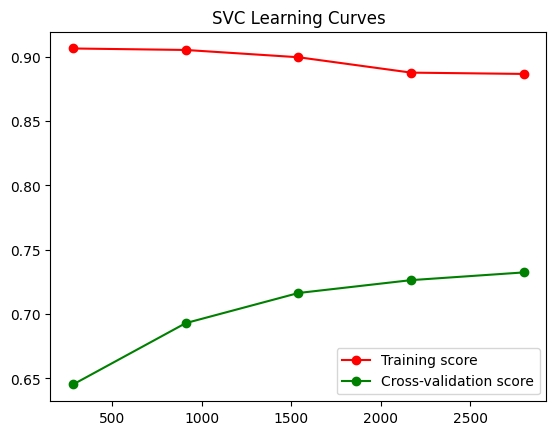

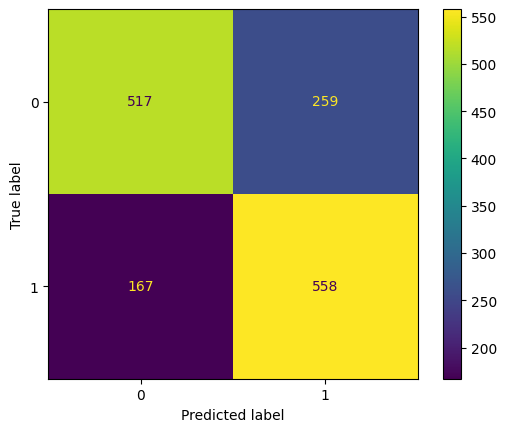

              precision    recall  f1-score   support

       happy       0.76      0.67      0.71       776
         sad       0.68      0.77      0.72       725

    accuracy                           0.72      1501
   macro avg       0.72      0.72      0.72      1501
weighted avg       0.72      0.72      0.72      1501



In [11]:
params = {'C': [1, 1.25, 1.5]}
svc_clf = SVC()
# svc_clf = GridSearchCV(svc_clf, params)

train_sizes, train_scores, test_scores = learning_curve(
    svc_clf, X_train, y_train, random_state=random_state)

plot_learning_curves(train_sizes, train_scores,
                     test_scores, title='SVC Learning Curves')
print_best_params(svc_clf, params)

svc_clf.fit(X_train, y_train)
make_predictions(svc_clf, X_test, y_test)

#### SGD

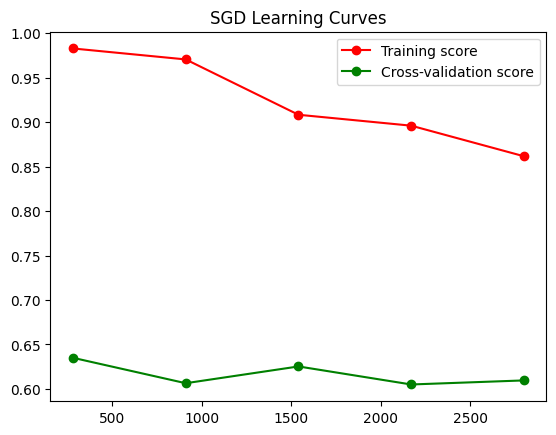

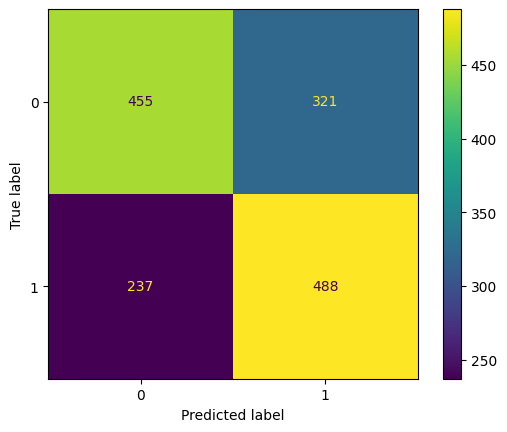

              precision    recall  f1-score   support

       happy       0.66      0.59      0.62       776
         sad       0.60      0.67      0.64       725

    accuracy                           0.63      1501
   macro avg       0.63      0.63      0.63      1501
weighted avg       0.63      0.63      0.63      1501



In [12]:
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)

train_sizes, train_scores, test_scores = learning_curve(
    sgd_clf, X_train, y_train, random_state=random_state)

plot_learning_curves(train_sizes, train_scores,
                     test_scores, title='SGD Learning Curves')
print_best_params(sgd_clf, params)

sgd_clf.fit(X_train, y_train)
make_predictions(sgd_clf, X_test, y_test)

#### MLP

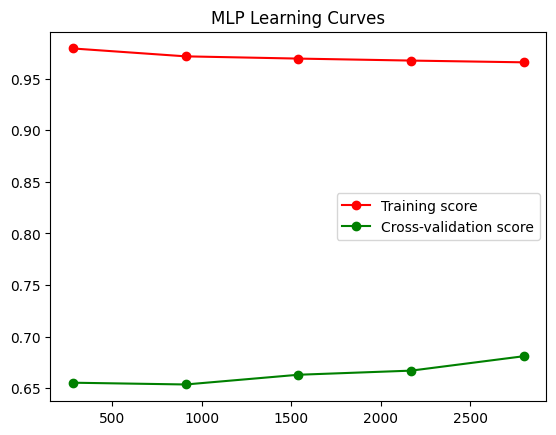

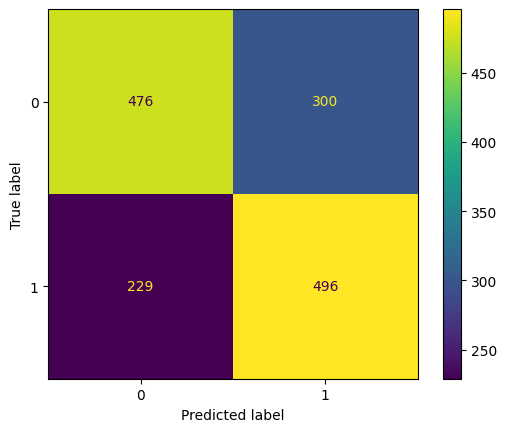

              precision    recall  f1-score   support

       happy       0.68      0.61      0.64       776
         sad       0.62      0.68      0.65       725

    accuracy                           0.65      1501
   macro avg       0.65      0.65      0.65      1501
weighted avg       0.65      0.65      0.65      1501



In [13]:
mlp_clf = MLPClassifier(activation='relu', solver='adam', alpha=1e-2,
                        hidden_layer_sizes=(4,), max_iter=1000, random_state=random_state)

train_sizes, train_scores, test_scores = learning_curve(
    mlp_clf, X_train, y_train, random_state=random_state)

plot_learning_curves(train_sizes, train_scores,
                     test_scores, title='MLP Learning Curves')
print_best_params(mlp_clf, params)

mlp_clf.fit(X_train, y_train)
make_predictions(mlp_clf, X_test, y_test)

### Salvataggio modello

In [14]:
dump(svc_clf, os.path.join(os.getcwd(), model_dir, 'svc_clf_happy_sad.joblib'))

['/Users/dario/Desktop/vp/notebook/../models/svc_clf_happy_sad.joblib']